In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time 

C:\Users\KISHOLOY\AppData\Local\Temp\ipykernel_15332\1956561337.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [35]:
def parser(s): 
  return datetime.strptime(s, '%Y-%m-%d')

In [36]:
production_ice_cream = pd.read_csv('E:\Marketing, Advertising & Data Science\Python, SQL & R projects\ice cream.csv', parse_dates = [0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\KISHOLOY\AppData\Local\Temp\ipykernel_15332\1687500114.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  production_ice_cream = pd.read_csv('E:\Marketing, Advertising & Data Science\Python, SQL & R projects\ice cream.csv', parse_dates = [0], index_col=0, squeeze=True, date_parser=parser)


In [37]:
#The above code is reading a CSV file named "ice cream.csv" using the pandas library in Python, and creating a pandas Series object called production_ice_cream from the data in the CSV file.

#The read_csv() function in pandas is used to read the CSV file. The first argument to read_csv() is the path to the CSV file, which in this case is 'E:\Marketing, Advertising & Data Science\Python, SQL & R projects\ice cream.csv'.

#The other arguments to read_csv() are:

    #parse_dates=[0]: This tells pandas to parse the first column of the CSV file as dates. The [0] indicates that the first column is being parsed.
    #index_col=0: This tells pandas to use the first column of the CSV file as the index for the resulting Series object.
    #squeeze=True: This tells pandas to return a Series object instead of a DataFrame object.
   #date_parser=parser: This tells pandas to use a custom function called parser to parse the dates in the CSV file. The parser function is defined elsewhere in the code.

#So, overall, this code is reading a CSV file that contains ice cream production data, parsing the date column as dates, and creating a pandas Series object called production_ice_cream with the dates as the index.

In [38]:
production_ice_cream

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: IPN31152N, Length: 577, dtype: float64

In [39]:
#infer frequency of the data
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [40]:
#This code takes a pandas DataFrame object production_ice_cream and modifies its frequency to match the inferred frequency of the DataFrame's index using the asfreq() method.

#The infer_freq() function is called with the index of the production_ice_cream DataFrame as its argument, which attempts to infer the frequency of the DataFrame's index. For example, if the index is a DatetimeIndex, this function will try to infer the frequency of the time series (e.g. daily, weekly, monthly, etc).

#Then, the asfreq() method is called on production_ice_cream with the inferred frequency as its argument. This method returns a new DataFrame with the same data, but with a new frequency that matches the inferred frequency of the index.

#In summary, this code is used to resample a time series in the production_ice_cream DataFrame to match the inferred frequency of the DataFrame's index.

In [41]:
#just get data from 2010 onwards 
start_date = pd.to_datetime('2010-01-01')
production_ice_cream = production_ice_cream[start_date:]

In [42]:
production_ice_cream

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: IPN31152N, Length: 121, dtype: float64

Text(0, 0.5, 'Production')

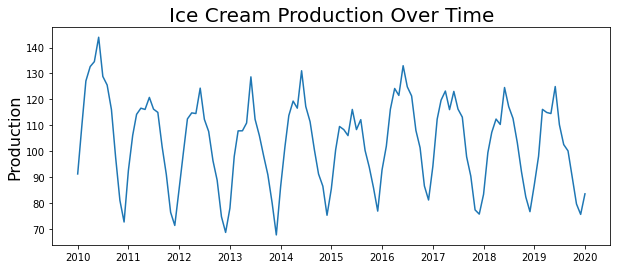

In [43]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('Ice Cream Production Over Time', fontsize = 20)
plt.ylabel('Production', fontsize=16)

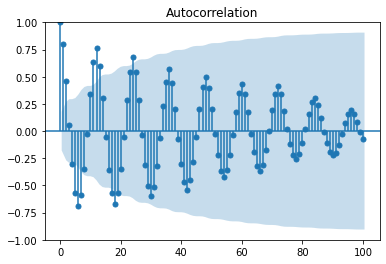

In [44]:
acf_plot = plot_acf(production_ice_cream, lags=100)

In [45]:
#Based on decaying ACF, we are likely to be dealing with an Auto Regressive Process 

C:\Users\KISHOLOY\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


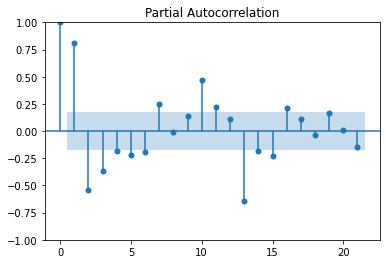

In [46]:
pacf_plot = plot_pacf(production_ice_cream)

In [20]:
#Based on PACF, we can start with AR Model with lags 1,2,3 

In [21]:
#TRAINING AND TESTING SETS

In [47]:
train_end = datetime(2018, 12, 1)
test_end = datetime(2019, 12, 1)

In [48]:
train_data = production_ice_cream[:train_end]
test_data = production_ice_cream[train_end + timedelta(days=1):test_end]

In [24]:
#timedelta(days=1) is a Python function that creates a time duration object representing one day.

#It is used to add a duration of one day to the train_end datetime object. This results in a new datetime object that is one day after train_end. This new datetime object is then used as the starting point for the subset of data that is being extracted from the production_ice_cream DataFrame or Series.

#The purpose of adding one day is likely to exclude the last day of the training period from the test_data subset. This is a common practice in time series analysis to ensure that the model is not being tested on data that it has already seen during the training phase.

In [25]:
#FIT THE AR MODEL

In [53]:
#create the model
model = ARIMA(train_data, order = (3,0,0))

In [54]:
#The ARIMA (Autoregressive Integrated Moving Average) model takes three arguments: p, d, and q.

    #p is the order of the autoregressive (AR) component, which represents the number of lagged values of the time series to include in the model.
    #d is the degree of differencing, which represents the number of times that the time series is differenced to make it stationary.
    #q is the order of the moving average (MA) component, which represents the number of lagged forecast errors to include in the model.

#Together, these three parameters determine the structure of the ARIMA model. The model is often denoted as ARIMA(p,d,q), where p, d, and q are the values of the corresponding parameters.

#For example, an ARIMA(1,1,1) model includes one lagged value of the time series in the autoregressive component, one degree of differencing, and one lagged forecast error in the moving average component.

In [56]:
#fit the model and calculate time taken to fit the model - shows efficiency of the model choice, including orders etc.
start = time()
model_fit=model.fit()
end=time()
print('Model fitting time', end - start)

Model fitting time 0.10094141960144043


In [57]:
#summary of the model 

In [60]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              IPN31152N   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Sun, 23 Apr 2023   AIC                            758.170
Time:                        03:07:22   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [61]:
#P value is significant for L1 and L3, for L2 it is too high, > 0.05 so only Lags 1 and 3 need to be considered, L2 not important 

In [62]:
#get predictions and residuals 
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [63]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [64]:
residuals = test_data - predictions 

Text(0, 0.5, 'Error')

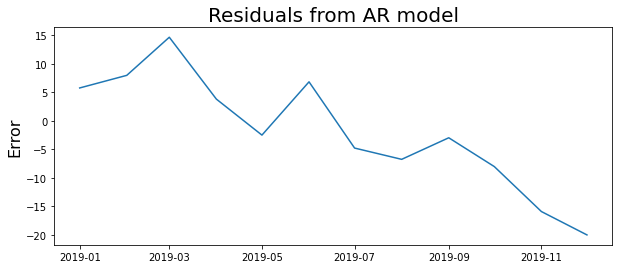

In [65]:
plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title('Residuals from AR model', fontsize = 20)
plt.ylabel('Error', fontsize = 16)

Text(0, 0.5, 'Production')

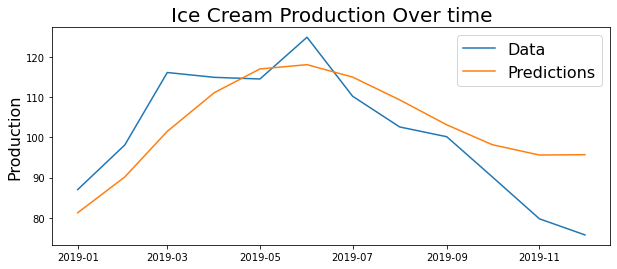

In [66]:
plt.figure(figsize = (10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize = 16)
plt.title("Ice Cream Production Over time", fontsize = 20)
plt.ylabel('Production', fontsize = 16)

In [67]:
#Residuals: we can see it decreasing over time, which is not something we typially want and so something is not captured in the data in our analysis.
#As one commenter said, we did not remove stationarity, so that could be a reason for this 
#Predictions: they are worsening as time progresses 

In [68]:
import statsmodels.api as sm
ar_model = sm.tsa.ARMA(data, order=(3,0)).fit()

NameError: name 'sm' is not defined